In [ ]:
library(stats) #para acceder a ts

# Introducción

Una serie de tiempo es una secuencia de valores de alguna variable ordenados cronológicamente. Los valores se registran a intervalos de tiempo constantes, por ejemplo cada día o cada hora:

$$y_1, y_2, y_3, \ldots, y_t$$

Cada vez es más común disponer de series de tiempo a partir del registro de eventos en distintas áreas , **destacándose las financieras**, aunque es también común encontrarlas en:

* Medicina (electrocardiogramas).
* Geología (sismógrafos). 
* Climatología (para representar la evolución de diferentes variables ambientales).


## Autocorrelación

Las técnicas de aprendizaje automático tradicionales, como la regresión o la clasificación, no pueden emplearse directamente en el análisis de series de tiempo debido a que sus observaciones presentan una correlación temporal muy alta, esto es, el valor $y_t$ depende fuertemente de sus valores previos más recientes: $y_{t-1}, y_{t-2}, y_{t-3}, \ldots$. A esta característica se le denomina **autocorrelación**, la definiremos y evaluaremos algunos ejemplos más adelante.


## Ejemplos

Las siguientes celdas muestran algunos ejemplos de series de tiempo en diversos contextos.


### Temperatura en DFW

Esta serie de tiempo registra la temperatura promedio mensual registrada en el área metropolitana de Dallas-Fort Worth desde el 1 de enero del año 1900 (escala Fahrenheit):   


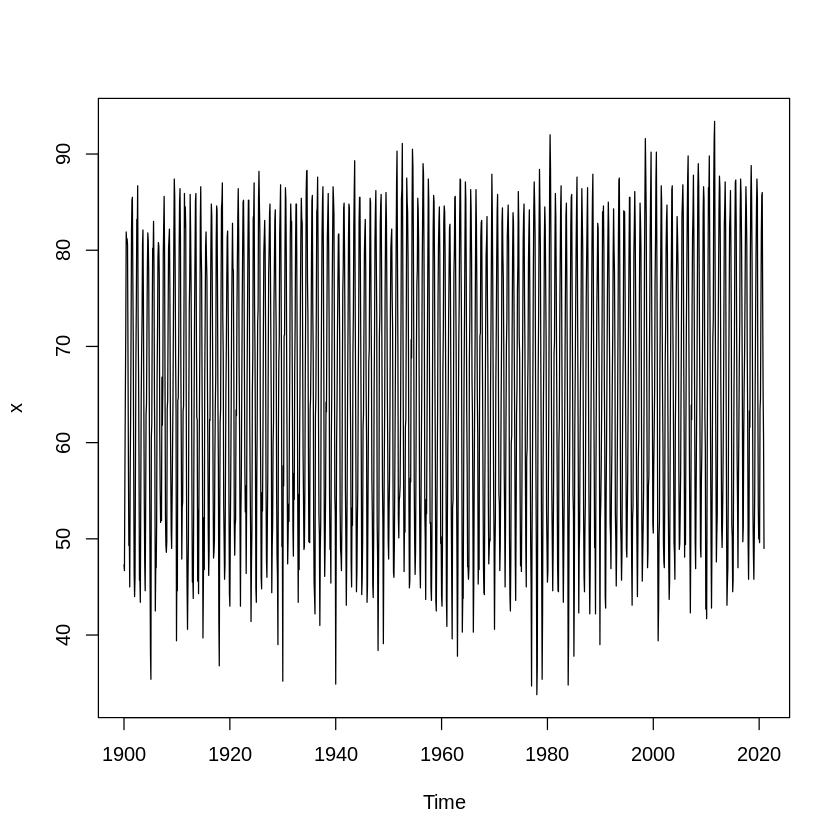

In [ ]:
dfw_mon <- read.csv("dfw_mon.csv")
dfw_mon.ts <- ts(dfw_mon, start = c(1900,1,1), frequency = 12)
plot(dfw_mon.ts) 

Las características de la serie pueden apreciarse mejor si revisamos un pequeño intervalo de tiempo. 

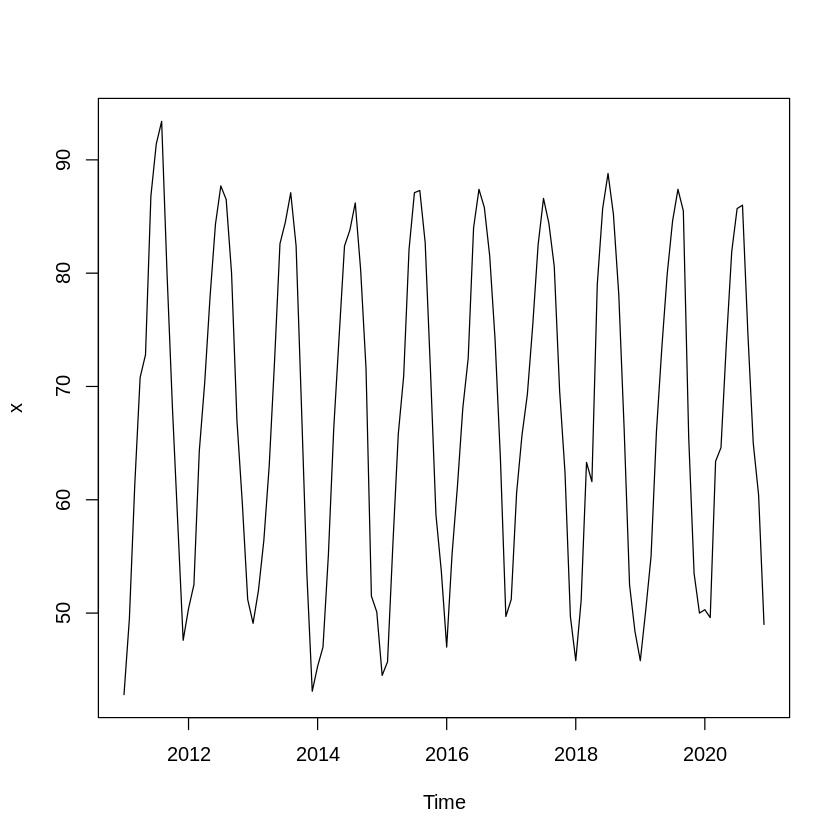

In [ ]:
dfw_2011 <- window(dfw_mon.ts, start = 2011)
plot(dfw_2011) 

### Bitcoin

La siguiente serie muestra la evolución del precio del Bitcoin desde el 1 de mayo 2020:

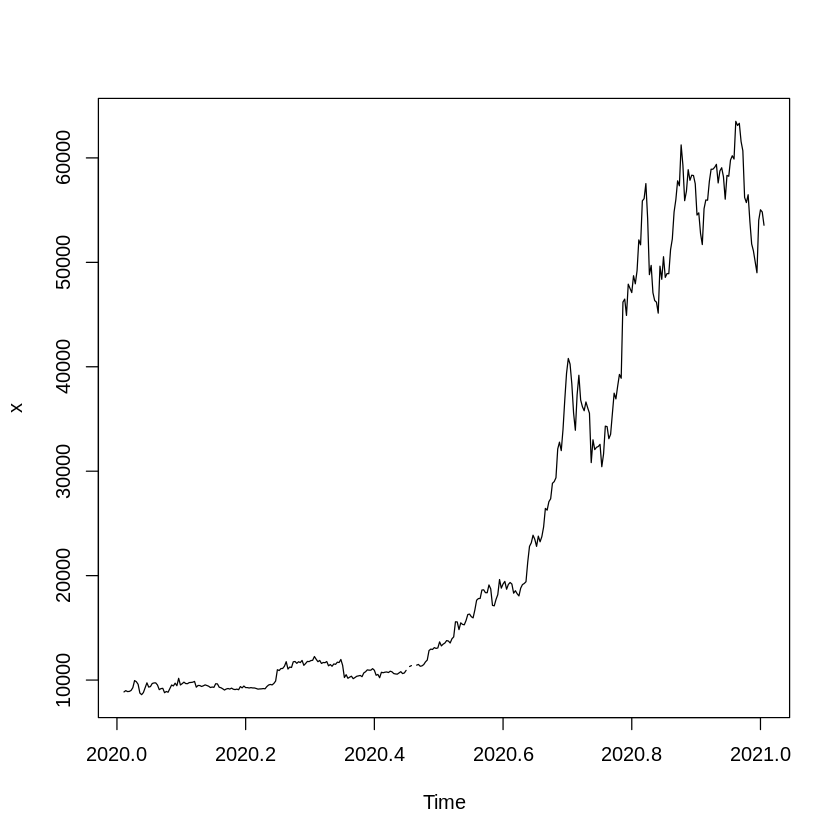

In [ ]:
bitcoin <- read.csv("bitcoin.csv")
bitcoin.ts <- ts(bitcoin, start= c(2020,5,1),frequency= 365)

plot(bitcoin.ts)

La serie presenta algunos valores faltantes, los cuales pueden ser imputados mediante interpolación lineal:

In [ ]:
which(is.na(bitcoin))

[1] 162 165 166

In [ ]:
bitcoin[162,] <- mean(bitcoin[c(161,163),]) 
bitcoin[162,] #valor real 11,064.46

[1] 11109.99

In [ ]:
bitcoin[165,] <- 2/3*bitcoin[164,]+1/3*bitcoin[167,]
bitcoin[165,] # valor real 11,555.36 

[1] 11399.29

In [ ]:
bitcoin[166,] <- 1/3*bitcoin[164,]+2/3*bitcoin[167,]
bitcoin[166,] # valor real 11,425.90

[1] 11414.4

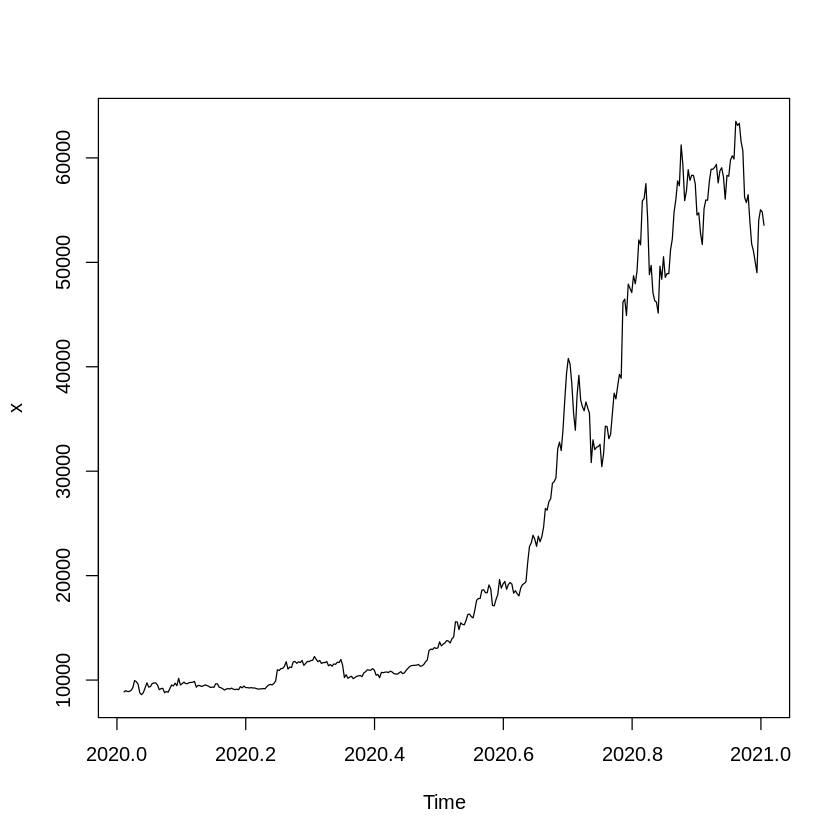

In [ ]:
bitcoin.ts <- ts(bitcoin, start= c(2020,5,1),frequency= 365.25)
plot(bitcoin.ts)

### Tesla

Precio de las acciones de Tesla.

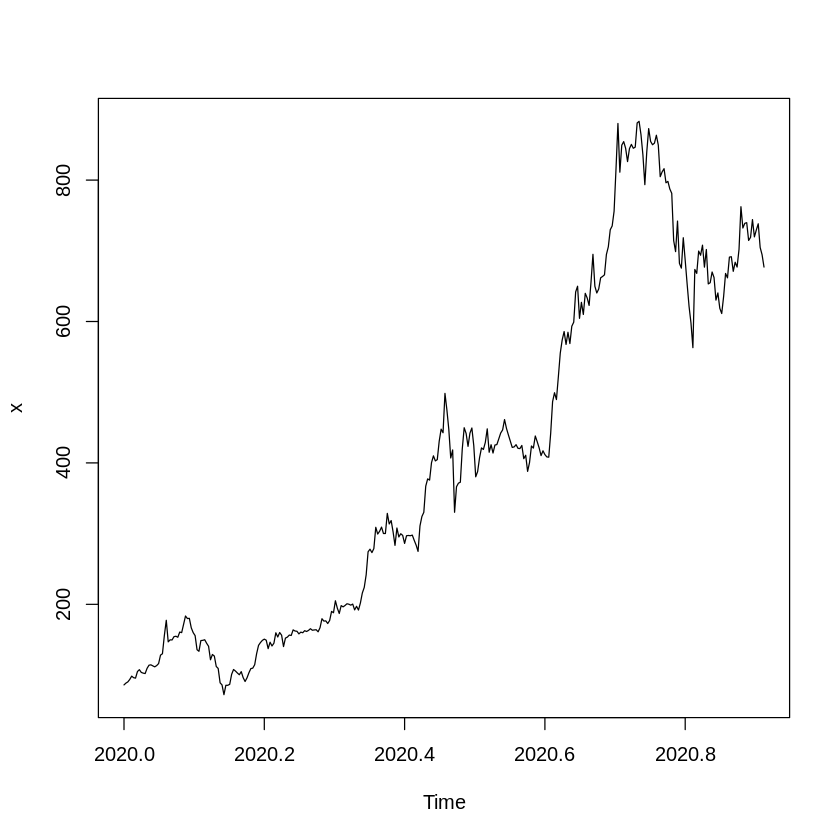

In [ ]:
tesla <- read.csv("tesla.csv")
tesla.ts = ts(tesla,start= c(2020,1,1),frequency= 365) 
plot(tesla.ts)

### West Texas Crude Oil

Precios de venta (promedio mensual) del barril de ptróleo crudo West Texas International desde enero de 1990.

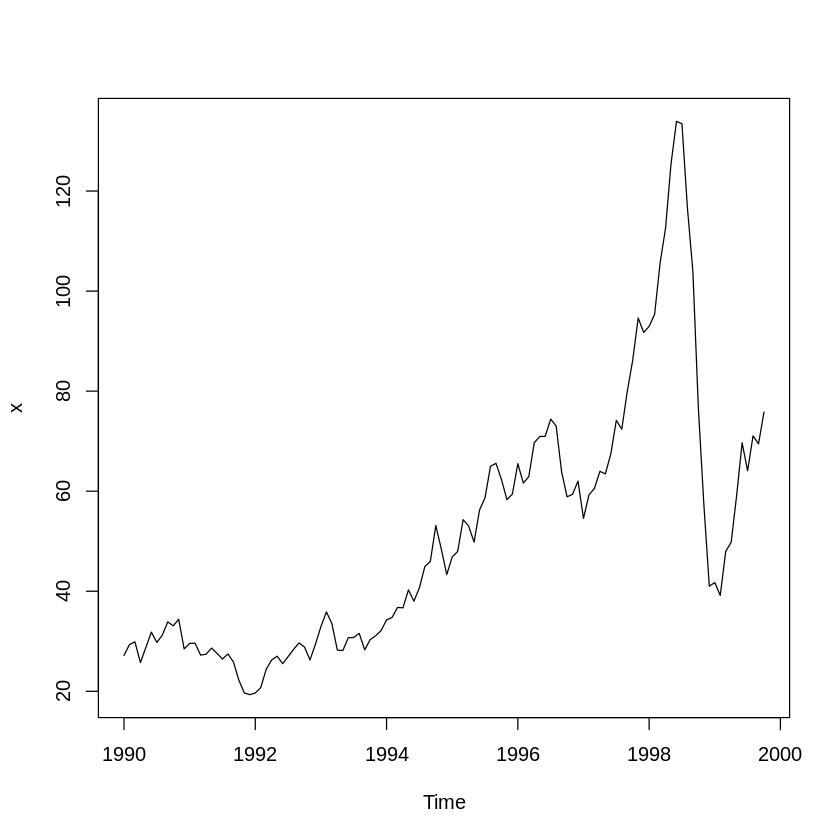

In [ ]:
wtcrude <- read.csv("wtcrude.csv")
wtcrude.ts = ts(wtcrude,start= c(1990,1),frequency= 12) 
plot(wtcrude.ts)

### Manchas solares

La siguiente serie muestra el total de manchas solares identificadas en el sol (anualmente) desde el año 1700. 

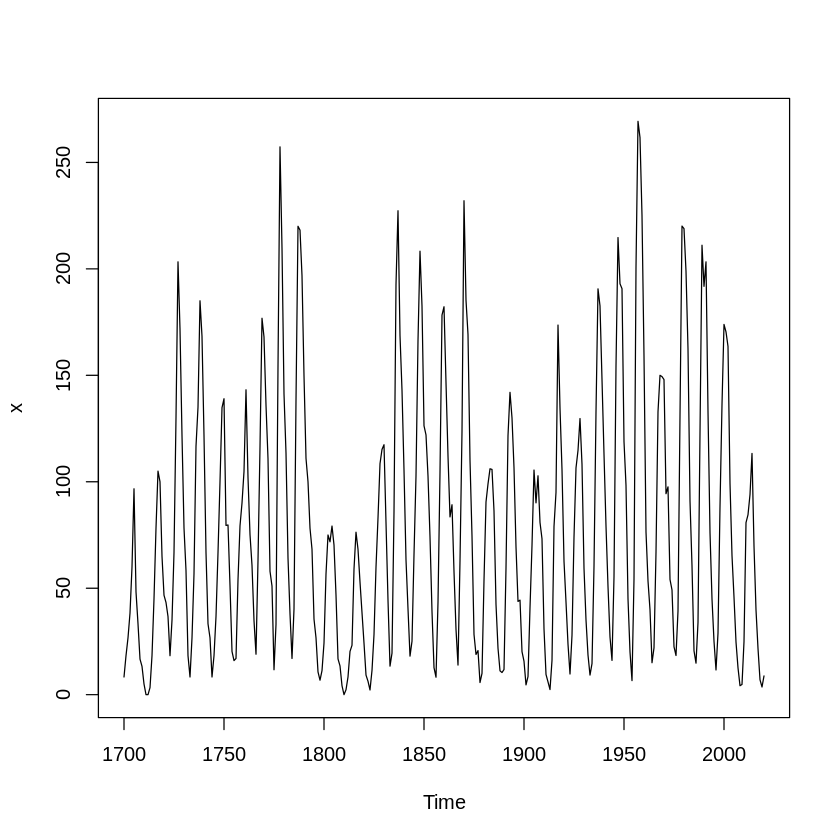

In [ ]:
sunspot <- read.csv("sunspot2.0.csv")
sunspot.ts = ts(sunspot,start= c(1700,1),frequency=1) 
plot(sunspot.ts)

Las manchas solares muestran ciclos de alrededor de 11 años.

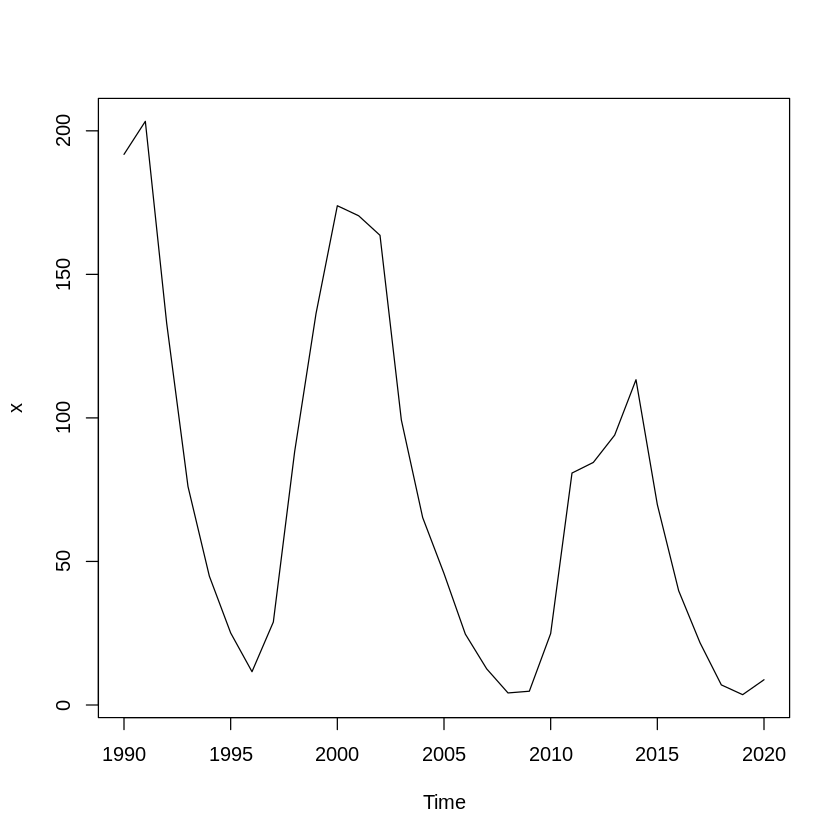

In [ ]:
sunspot_1990 <- window(sunspot.ts, start = 1990)
plot(sunspot_1990) 

### Pasajeros transporte aéreo

La siguiente serie muestra el total de pasajeros transportados por la industria aérea en cada mes desde 1949.

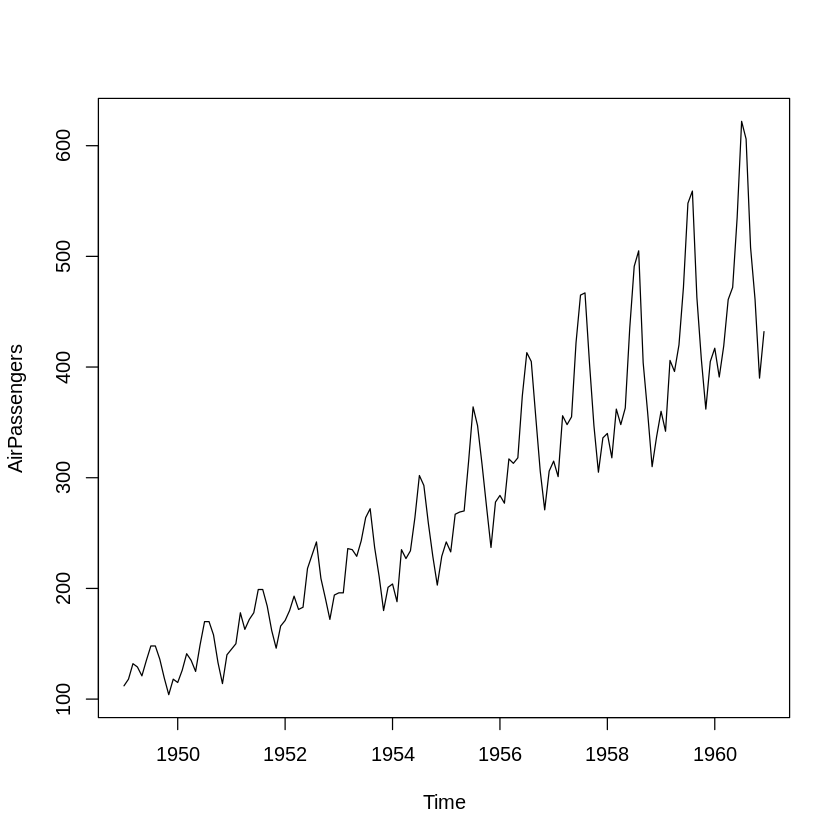

In [ ]:
plot(AirPassengers)

## Características

En el análisis de una serie de tiempo nos preocupamos por identificar características (patrones) que la describan, por ejemplo:



### Tendencia

La serie de tiempo del precio del Bitcoin muestró una tendencia de crecimiento clara hasta un poco antes del final del 2020:

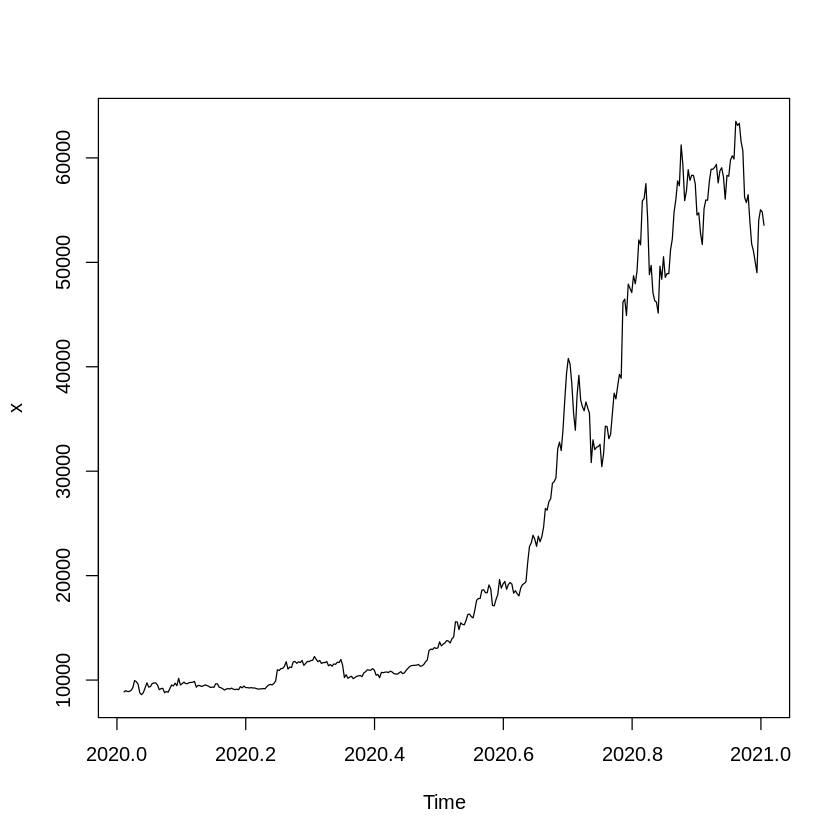

In [ ]:
plot(bitcoin.ts)

### Estacionalidad

Diferentes fenómenos muestran un comportamiento estacional claro, por ejemplo, la temperatura promedio registrada cada mes tiene un comportamiento estacional con un periodo de 12 meses: 

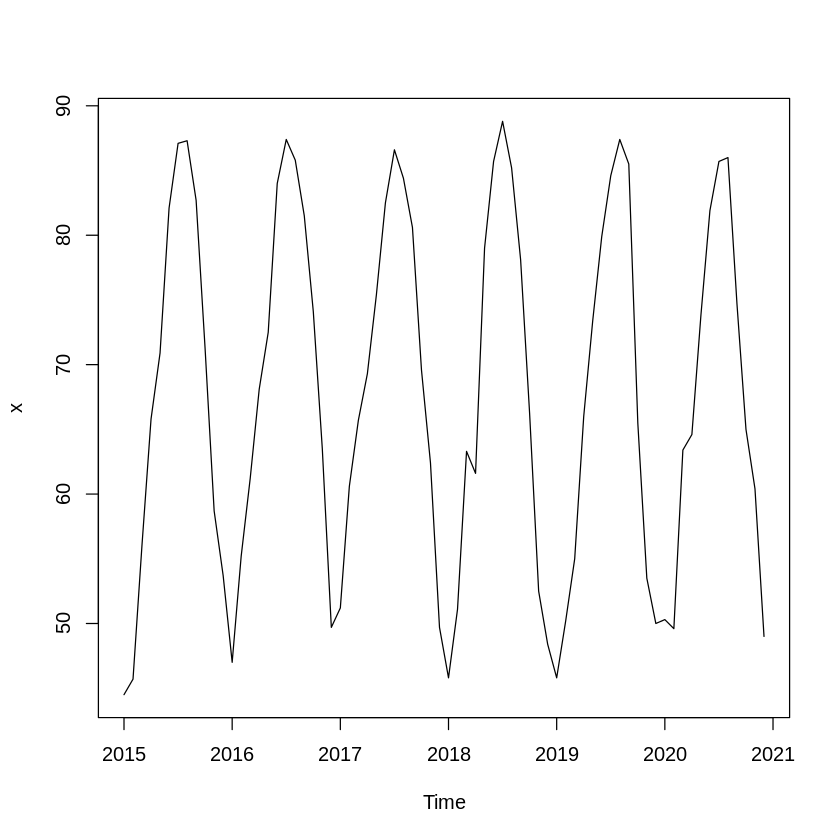

In [ ]:
dfw_2015 <- window(dfw_mon.ts, start = 2015)
plot(dfw_2015) 

La demanda de diferentes productos sigue un patrón estacional, por ejemplo, puede ser alta en el verano y baja en el invierno.

Otros patrones que puede presentar una serie de tiempo son:

1. **Ciclos**. Secuencias de máximos y mínimos que no necesariamente son estacionales. Por ejemplo, en un ciclo, la economía pasa por las fases de expansión, auge, contracción y depresión. La actividad de las manchas solares forman también un ciclo.  
2. **Ruido**. Patrón aleatorio no explicable.  



<font color="red">Actividad</font>

* Accede al tablero del CONACyT sobre los contagios por COVID en México: https://datos.covid-19.conacyt.mx/
* Descarga los datos de contagios diarios (panel de la izquierda)
* Construye la serie de tiempo de los casos a nivel nacional.
* Construye la serie de tiempo de los casos en Quintana Roo.


# Nacional

In [ ]:
casos_covid <- read.csv("casos.csv") #Cargamos los datos
nacional <- tail(casos_covid, 1) #Tomamos la ultima fila la cual contiene los datos a nivel nacional
nacional

,cve_ent,poblacion,nombre,X26.02.2020,X27.02.2020,X28.02.2020,X29.02.2020,X01.03.2020,X02.03.2020,X03.03.2020,⋯,X28.10.2022,X29.10.2022,X30.10.2022,X31.10.2022,X01.11.2022,X02.11.2022,X03.11.2022,X04.11.2022,X05.11.2022,X06.11.2022
,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
33,0,127792286,Nacional,0,4,2,2,2,5,9,⋯,406,135,90,526,403,318,500,268,59,40


In [ ]:
library(tidyverse)
nacional <- nacional %>% select(4:988) #Utilizamos la funcion select para seleccionar las columnas desde la 3 hasta la ultima de la tabla las cuales contienen unicamente los valores de cada dia
nacional <- data.frame(as.integer(t(nacional))) #Transponemos la tabla, convertimos los valores a enteros y creamos un dataframe con los datos
names(nacional) <- "Casos Diarios Covid Nacional" #Ponemos una cabecera a la columna del dataframe
nacional

Casos Diarios Covid Nacional
<int>
0
4
2
2
2
5
9
10
11


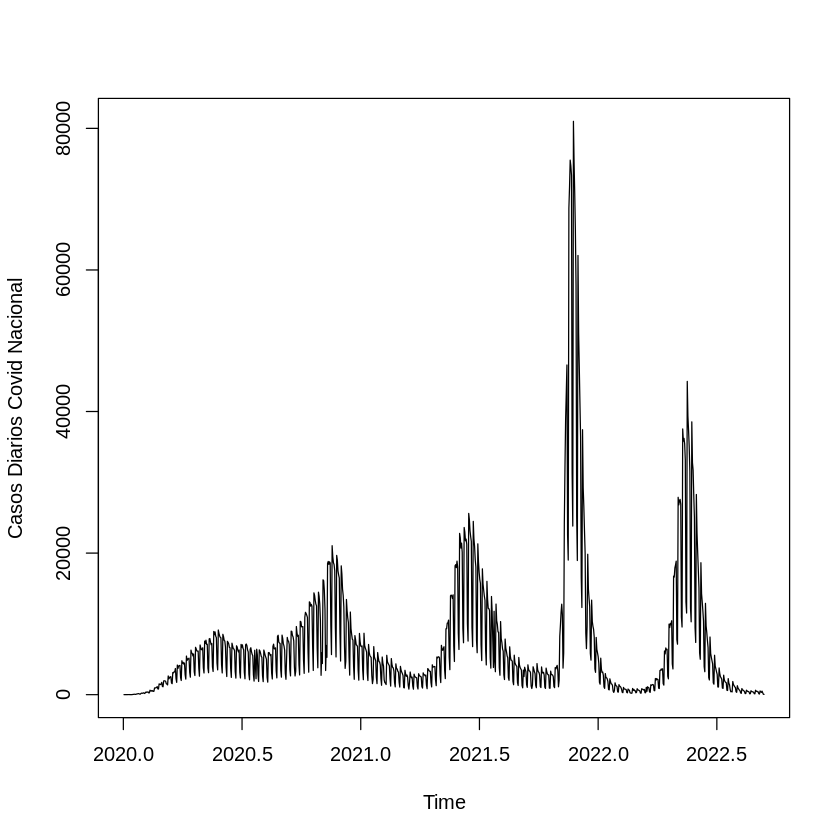

In [ ]:
nacional.ts <- ts(nacional, start = c(2020,2,26), frequency = 365) #Creamos la serie de tiempo con los datos, empezando desde la fecha inicial de los datos y con una frecuencia diaria
plot(nacional.ts) #Mostramos la grafica de la serie de tiempo

# Quintana Roo

In [ ]:
qroo <- tail(casos_covid, 11) #Tomamos las ultimas 11 filas de la tabla de casos covid
qroo <- head(qroo, 1) #Tomamos la primera fila del corte anterior para quedarnos unicamente con los datos de Quintana Roo
qroo

,cve_ent,poblacion,nombre,X26.02.2020,X27.02.2020,X28.02.2020,X29.02.2020,X01.03.2020,X02.03.2020,X03.03.2020,⋯,X28.10.2022,X29.10.2022,X30.10.2022,X31.10.2022,X01.11.2022,X02.11.2022,X03.11.2022,X04.11.2022,X05.11.2022,X06.11.2022
,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
23,23,1723259,QUINTANA ROO,0,0,0,0,0,0,0,⋯,7,5,4,21,11,17,23,24,2,1


In [ ]:
qroo <- qroo %>% select(4:988) #Utilizamos la funcion select para seleccionar las columnas desde la 4 hasta la ultima de la tabla las cuales contienen unicamente los valores de cada dia
qroo <- data.frame(as.integer(t(qroo))) #Transponemos la tabla, convertimos los valores a enteros y creamos un dataframe con los datos
names(qroo) <- "Casos Diarios Covid Quintana Roo" #Ponemos una cabecera a la columna del dataframe
qroo

Casos Diarios Covid Quintana Roo
<int>
0
0
0
0
0
0
0
0
0


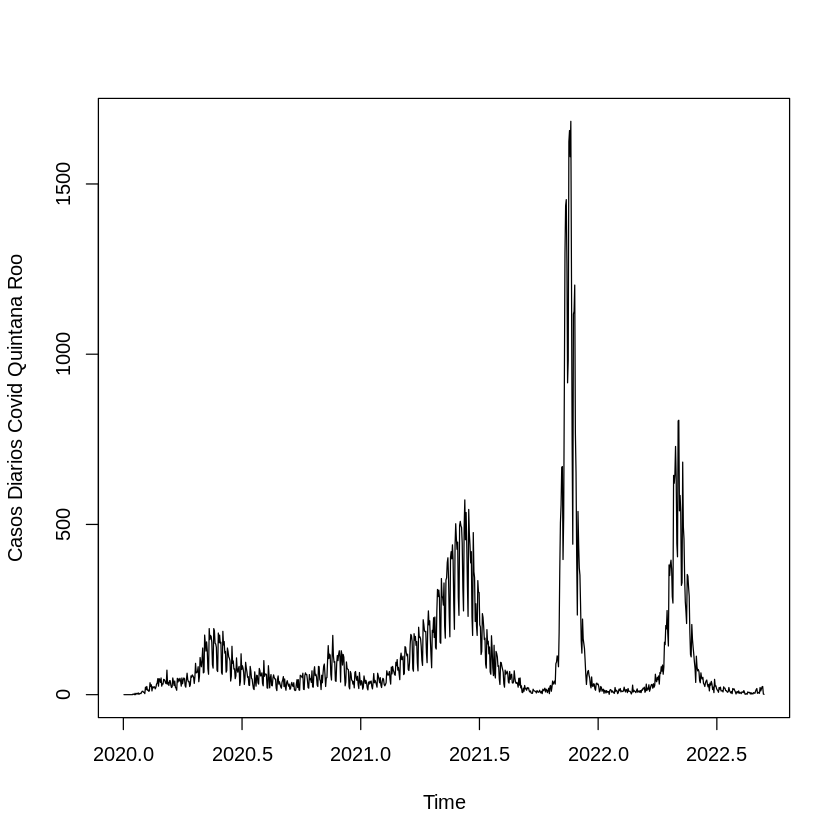

In [ ]:
qroo.ts <- ts(qroo, start = c(2020,2,26), frequency = 365) #Creamos la serie de tiempo con los datos, empezando desde la fecha inicial de los datos y con una frecuencia diaria
plot(qroo.ts) #Mostramos la grafica de la serie de tiempo